Importing libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Reading Data

In [3]:
df = pd.read_excel('Data_Train.xlsx')

Exploring Data

In [4]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


Let's Check for NULL values

In [6]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
df.dropna(axis=0, inplace = True)

In [8]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

Data Cleaning

In [9]:
df.drop(['Route', 'Additional_Info'], axis = 1, inplace = True)

In [10]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,13302


In [11]:
df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [12]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [13]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 9 columns):
Airline            10682 non-null object
Date_of_Journey    10682 non-null object
Source             10682 non-null object
Destination        10682 non-null object
Dep_Time           10682 non-null object
Arrival_Time       10682 non-null object
Duration           10682 non-null object
Total_Stops        10682 non-null object
Price              10682 non-null int64
dtypes: int64(1), object(8)
memory usage: 834.5+ KB


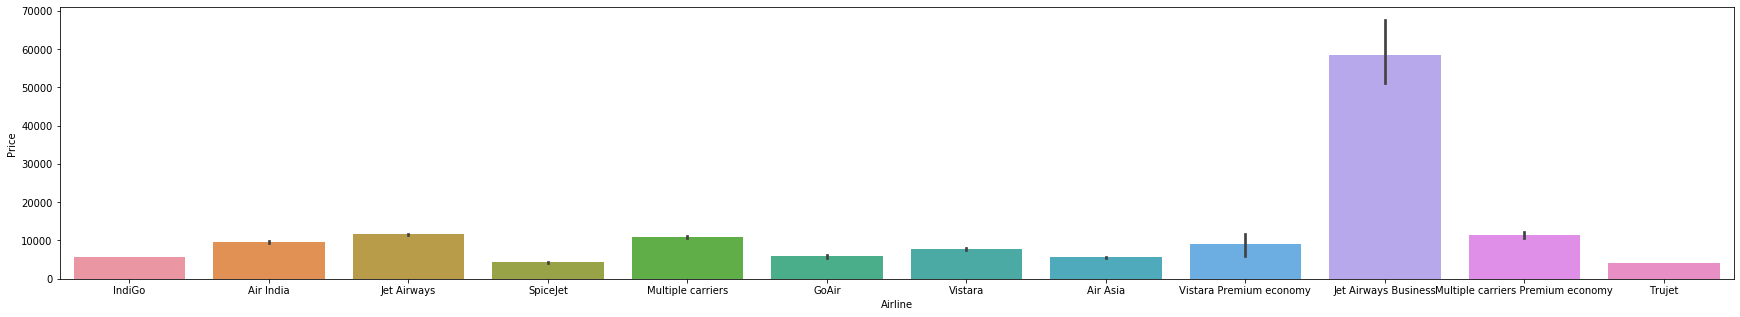

In [15]:
plt.figure(figsize=(30,5))
sns.barplot(x="Airline",y="Price",data=df)

In [16]:
df['Total_Stops'] = df['Total_Stops'].replace(['non-stop','1 stop', '2 stops', '3 stops', '4 stops'], [0, 1, 2, 3, 4])

In [17]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,0,3897
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1,13302


In [18]:
airline = pd.get_dummies(df['Airline'], drop_first = True)
destination = pd.get_dummies(df['Destination'], drop_first = True)

In [19]:
df = pd.concat([df, airline, destination], axis = 1)

In [20]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Air India,...,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,0,3897,0,...,0,0,0,0,0,0,0,0,0,1
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2,7662,1,...,0,0,0,0,0,0,0,0,0,0
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2,13882,0,...,0,0,0,0,0,1,0,0,0,0
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1,6218,0,...,0,0,0,0,0,0,0,0,0,0
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1,13302,0,...,0,0,0,0,0,0,0,0,0,1


In [21]:
df.rename(columns = {'Kolkata':'Kolkata_dest', 'Delhi':'Delhi_dest'}, inplace = True)

In [22]:
source = pd.get_dummies(df['Source'], drop_first = True)
df = pd.concat([df, source], axis = 1)
df.rename(columns = {'Kolkata':'Kolkata_source', 'Delhi':'Delhi_source'}, inplace = True)

In [23]:
df.drop(['Airline', 'Source', 'Destination'], axis = 1, inplace = True)

In [24]:
df.head()

,Date_of_Journey,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Air India,GoAir,IndiGo,Jet Airways,...,Vistara Premium economy,Cochin,Delhi_dest,Hyderabad,Kolkata_dest,New Delhi,Chennai,Delhi_source,Kolkata_source,Mumbai
0,24/03/2019,22:20,01:10 22 Mar,2h 50m,0,3897,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,1/05/2019,05:50,13:15,7h 25m,2,7662,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,9/06/2019,09:25,04:25 10 Jun,19h,2,13882,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
3,12/05/2019,18:05,23:30,5h 25m,1,6218,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,01/03/2019,16:50,21:35,4h 45m,1,13302,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [25]:
y = df['Price']

In [26]:
df.drop(['Price'], axis = 1, inplace = True)

In [27]:
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])
df.head()

,Date_of_Journey,Dep_Time,Arrival_Time,Duration,Total_Stops,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,...,Vistara Premium economy,Cochin,Delhi_dest,Hyderabad,Kolkata_dest,New Delhi,Chennai,Delhi_source,Kolkata_source,Mumbai
0,2019-03-24,22:20,01:10 22 Mar,2h 50m,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,2019-01-05,05:50,13:15,7h 25m,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2019-09-06,09:25,04:25 10 Jun,19h,2,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
3,2019-12-05,18:05,23:30,5h 25m,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,2019-01-03,16:50,21:35,4h 45m,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [28]:
df['Day_of_Journey'] = df['Date_of_Journey'].dt.dayofweek

In [29]:
df.head()

,Date_of_Journey,Dep_Time,Arrival_Time,Duration,Total_Stops,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,...,Cochin,Delhi_dest,Hyderabad,Kolkata_dest,New Delhi,Chennai,Delhi_source,Kolkata_source,Mumbai,Day_of_Journey
0,2019-03-24,22:20,01:10 22 Mar,2h 50m,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,6
1,2019-01-05,05:50,13:15,7h 25m,2,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,5
2,2019-09-06,09:25,04:25 10 Jun,19h,2,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,4
3,2019-12-05,18:05,23:30,5h 25m,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,3
4,2019-01-03,16:50,21:35,4h 45m,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,3


In [30]:
df['month']=df['Date_of_Journey'].dt.month
df['date']=df['Date_of_Journey'].dt.day

In [31]:
df['dep_time'] = pd.to_datetime(df['Dep_Time'], format = '%H:%M')
df['Hour_dep'] = df['dep_time'].dt.hour 
df['minute_dep'] = df['dep_time'].dt.minute 

In [32]:
df.drop(['Dep_Time', 'dep_time', 'Date_of_Journey'], axis = 1, inplace = True)

In [66]:
df.head()

,Arrival_Time,Duration,Total_Stops,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,...,New Delhi,Chennai,Delhi_source,Kolkata_source,Mumbai,Day_of_Journey,month,date,Hour_dep,minute_dep
0,01:10 22 Mar,2h 50m,0,0,0,1,0,0,0,0,...,1,0,0,0,0,6,3,24,22,20
1,13:15,7h 25m,2,1,0,0,0,0,0,0,...,0,0,0,1,0,5,1,5,5,50
2,04:25 10 Jun,19h,2,0,0,0,1,0,0,0,...,0,0,1,0,0,4,9,6,9,25
3,23:30,5h 25m,1,0,0,1,0,0,0,0,...,0,0,0,1,0,3,12,5,18,5
4,21:35,4h 45m,1,0,0,1,0,0,0,0,...,1,0,0,0,0,3,1,3,16,50


In [67]:
df.columns

Index(['Arrival_Time', 'Duration', 'Total_Stops', 'Air India', 'GoAir',
       'IndiGo', 'Jet Airways', 'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Cochin', 'Delhi_dest', 'Hyderabad',
       'Kolkata_dest', 'New Delhi', 'Chennai', 'Delhi_source',
       'Kolkata_source', 'Mumbai', 'Day_of_Journey', 'month', 'date',
       'Hour_dep', 'minute_dep'],
      dtype='object')

In [68]:
duration = list(df['Duration'])
for i in range(len(duration)) :
    if len(duration[i].split()) != 2:
        if 'h' in duration[i] :
            duration[i] = duration[i].strip() + ' 0m'
        elif 'm' in duration[i] :
            duration[i] = '0h {}'.format(duration[i].strip())
dur_hours = []
dur_minutes = []  
 
for i in range(len(duration)) :
    dur_hours.append(int(duration[i].split()[0][:-1]))
    dur_minutes.append(int(duration[i].split()[1][:-1]))
     
 
df['Duration_hours'] = dur_hours
df['Duration_minutes'] =dur_minutes
df.loc[:,'Duration_hours'] *= 60
df['Duration_Total_mins']= df['Duration_hours']+df['Duration_minutes']

In [69]:
df.drop(['Duration', 'Duration_hours', 'Duration_minutes'], axis = 1, inplace = True)

In [70]:
df['arr_time'] = pd.to_datetime(df['Arrival_Time'])
df['Hour_arr'] = df['arr_time'].dt.hour 
df['minute_arr'] = df['arr_time'].dt.minute

In [71]:
df.drop(['Arrival_Time', 'arr_time'], axis = 1, inplace = True)

In [72]:
df.head()

,Total_Stops,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,...,Kolkata_source,Mumbai,Day_of_Journey,month,date,Hour_dep,minute_dep,Duration_Total_mins,Hour_arr,minute_arr
0,0,0,0,1,0,0,0,0,0,0,...,0,0,6,3,24,22,20,170,1,10
1,2,1,0,0,0,0,0,0,0,0,...,1,0,5,1,5,5,50,445,13,15
2,2,0,0,0,1,0,0,0,0,0,...,0,0,4,9,6,9,25,1140,4,25
3,1,0,0,1,0,0,0,0,0,0,...,1,0,3,12,5,18,5,325,23,30
4,1,0,0,1,0,0,0,0,0,0,...,0,0,3,1,3,16,50,285,21,35


In [73]:
X = df[:]

In [74]:
X.head()

,Total_Stops,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,...,Kolkata_source,Mumbai,Day_of_Journey,month,date,Hour_dep,minute_dep,Duration_Total_mins,Hour_arr,minute_arr
0,0,0,0,1,0,0,0,0,0,0,...,0,0,6,3,24,22,20,170,1,10
1,2,1,0,0,0,0,0,0,0,0,...,1,0,5,1,5,5,50,445,13,15
2,2,0,0,0,1,0,0,0,0,0,...,0,0,4,9,6,9,25,1140,4,25
3,1,0,0,1,0,0,0,0,0,0,...,1,0,3,12,5,18,5,325,23,30
4,1,0,0,1,0,0,0,0,0,0,...,0,0,3,1,3,16,50,285,21,35


In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [44]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 11.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 25.4min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [45]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 80,
 'bootstrap': False}

In [76]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators= 1000,
 min_samples_split= 10,
 min_samples_leaf= 1,
 max_features= 'sqrt',
 max_depth= 80,
 bootstrap= False)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [77]:
rf.score(X_test, y_test)

0.8063442086091592

In [78]:
from sklearn.metrics import accuracy_score,r2_score
rs=r2_score(y_test,y_pred)

In [79]:
print(rs)

0.8063442086091592


In [80]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(y_test, y_pred))
print(rmse)

2131.614345292447


In [82]:
print(1 - np.sqrt(np.square(np.log10(y_pred +1) - np.log10(y_test +1)).mean()))

0.9205567627292427
